In [1]:
# Checks if the directory exists
import os
if os.path.exists("./Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting"):
    pass
else:
    !git clone https://github.com/abekek/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting.git

In [2]:
# moves to the right directory
%cd Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting

/scratch/alibek_2/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting


In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [4]:
# # installing PyTorch's Nightly version
# !pip3 install --pre torch torchvision -f https://download.pytorch.org/whl/nightly/cu101/torch_nightly.html -U

!pip3 install pycroscopy==0.60.7

if os.path.exists("./BGlib"):
    pass
else:
    !git clone https://github.com/pycroscopy/BGlib.git
    %cd BGlib/
    !git tag -l
    !git checkout 0.0.3
    !git branch -D master
    !git checkout -b master
    %cd ..

# downgrading the h5py version
!pip3 install 'h5py==2.10.0' --force-reinstall

You should consider upgrading via the '/scratch/alibek_2/alibek_env/bin/python3 -m pip install --upgrade pip' command.
  Using cached h5py-2.10.0-cp38-cp38-manylinux1_x86_64.whl (2.9 MB)
  Using cached numpy-1.22.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to tes

In [5]:
!pip install gdown

You should consider upgrading via the '/scratch/alibek_2/alibek_env/bin/python3 -m pip install --upgrade pip' command.


In [6]:
!pip install moviepy

You should consider upgrading via the '/scratch/alibek_2/alibek_env/bin/python3 -m pip install --upgrade pip' command.


In [7]:
!pip install pandas

You should consider upgrading via the '/scratch/alibek_2/alibek_env/bin/python3 -m pip install --upgrade pip' command.


In [8]:
!pip install tensorflow

  Using cached h5py-3.1.0-cp38-cp38-manylinux1_x86_64.whl (4.4 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached numpy-1.19.5-cp38-cp38-manylinux2010_x86_64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.0.1
    Uninstalling typing-extensions-4.0.1:
      Successfully uninstalled typing-extensions-4.0.1
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
You should consider upgrading via the '/scratch/alibek_2/alibek_env/bin/python3 -m pip install --upgra

### Importing Packages (code)

In [9]:
import gdown
import multiprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from numba import jit
import random
import time
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim.lr_scheduler as lr_scheduler
import argparse
#import seaborn as sns
from scipy.signal import resample
from scipy import fftpack
from scipy import io
from scipy import special
# import tensorflow as tf
# import tensorflow.keras.backend as K
# import tensorflow.keras.layers as layers
# from tensorflow.keras.layers import Input, LSTM, Dense
# from tensorflow.keras.layers import (Attention, Dense, Conv1D, Convolution2D, 
#                                      GRU, LSTM, Bidirectional, TimeDistributed,
#                                      Dropout, Flatten, LayerNormalization, 
#                                      RepeatVector, Reshape, MaxPooling1D, 
#                                      UpSampling1D, BatchNormalization, Activation)
# from tensorflow.keras.layers import Layer
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Reshape
# from tensorflow.keras.layers import BatchNormalization, Conv1D, MaxPooling1D
# from tensorflow.keras import layers
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.regularizers import l1, l2
# from tensorflow.keras.models import load_model
# from tensorflow.keras.callbacks import ModelCheckpoint
from multiprocessing import Pool, Process
import multiprocessing as mp
from moviepy.editor import *
import glob
from sklearn.metrics import mean_squared_error
import gc
import sidpy
from BGlib.BGlib import be as belib
 
# set up notebook to show plots within the notebook
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.patches import ConnectionPatch

# Import necessary libraries:
# General utilities:
import sys
import os
import gc

# Computation:
import numpy as np
import h5py
import pandas as pd

# Visualization:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Image
from IPython.display import clear_output
from mpl_toolkits.axes_grid1 import ImageGrid

# Finally, pycroscopy itself
sys.path.append('../../../')
import pyUSID as usid
from codes.util.preprocessing_global_standard_scaler import global_standard_scaler
from sidpy.hdf.hdf_utils import write_simple_attrs, get_attr
from pyUSID.io.hdf_utils import create_results_group, write_main_dataset, write_reduced_anc_dsets, create_empty_dataset, reshape_to_n_dims, get_auxiliary_datasets
from pyUSID.io.usi_data import USIDataset
from pyUSID.io import Dimension

from codes.util.file import print_tree
from codes.util.core import SHO_fit_func_torch, loop_fitting_function, loop_fitting_function_tf, computeDotProducts, normOfVar, fit_loop_function, computeTime, conventional_fit_loop_function
from codes.viz.plot import plot_best_worst_SHO, make_movie, plot_best_worst_loops, plot_reconstruction_comparison_SHO, plot_reconstruction_comparison_loops
from codes.util.postprocessing import transform_params, convert_real_imag
from codes.util.preprocessing_global_scaler import global_scaler
from codes.processing.filters import range_filter, clean_interpolate, interpolate_missing_points
from codes.algorithm.TRPCGOptimizerv2 import TRPCGOptimizerv2
from codes.algorithm.AdaHessian import AdaHessian

import numpy.lib.recfunctions as rfn

import json # For dealing with metadata
import os # For file level operations
import time # For timing demonstrations
import datetime # To demonstrate conversion between date and time formats
from datafed.CommandLib import API

# from xml.dom import minidom
# import numpy as np
# import os

# import xmltodict

In [10]:
torch.__version__

'1.9.0+cu111'

In [11]:
# shows the number of CPU cores
multiprocessing.cpu_count()

64

In [12]:
gc.collect()

70

In [13]:
!pip3 install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html --force-reinstall

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached https://download.pytorch.org/whl/cu111/torch-1.9.0%2Bcu111-cp38-cp38-linux_x86_64.whl (2041.3 MB)
  Using cached https://download.pytorch.org/whl/cu111/torchvision-0.10.0%2Bcu111-cp38-cp38-linux_x86_64.whl (23.2 MB)
  Using cached torchaudio-0.9.0-cp38-cp38-manylinux1_x86_64.whl (1.9 MB)
  Using cached typing_extensions-4.0.1-py3-none-any.whl (22 kB)
     |████████████████████████████████| 4.3 MB 7.6 MB/s eta 0:00:01
  Using cached numpy-1.22.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
  Attempting uninstall: pillow
 

In [14]:
# shows the GPU that is available and the resources
!nvidia-smi

Fri Jan 14 11:43:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.73.01    Driver Version: 460.73.01    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:2F:00.0 Off |                    0 |
| N/A   28C    P0    59W / 400W |  16204MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  A100-SXM4-40GB      Off  | 00000000:30:00.0 Off |                    0 |
| N/A   

In [15]:
torch.cuda.is_available()

True

In [16]:
# fixes the random seed for reproducible training
torch.set_default_dtype(torch.float64)
torch.manual_seed(42)
np.random.seed(42)

In [17]:
torch.__version__

'1.9.0+cu111'

### Loading data for SHO fitting (code)

In [18]:
#TODO place this file on Zenodo before publication 
# downloads the original experiment file
gdown.download('https://drive.google.com/uc?export=download&id=1Q2Qo_1VGlCsVOTjQpZlE5tjoIV1etVe2', 'data_file.h5', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Q2Qo_1VGlCsVOTjQpZlE5tjoIV1etVe2
To: /scratch/alibek_2/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/data_file.h5
100%|███████████████| 1.80G/1.80G [00:12<00:00, 142MB/s]


'data_file.h5'

In [19]:
# Opens the translated file
h5_f = h5py.File('./data_file.h5', 'r+')

#Inspects the h5 file
usid.hdf_utils.print_tree(h5_f)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data-SHO_Fit_000
      --------------------
      ├ Fit
      ├ Guess
      ├ Spectroscopic_Indices
      ├ Spectroscopic_Values
      ├ completed_fit_positions
      ├ completed_guess_positions
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS

In [20]:
print('Datasets and datagroups within the file:\n------------------------------------')
print_tree(h5_f.file)
 
print('\nThe main dataset:\n------------------------------------')
print(h5_f)
print('\nThe ancillary datasets:\n------------------------------------')
print(h5_f.file['/Measurement_000/Channel_000/Position_Indices'])
print(h5_f.file['/Measurement_000/Channel_000/Position_Values'])
print(h5_f.file['/Measurement_000/Channel_000/Spectroscopic_Indices'])
print(h5_f.file['/Measurement_000/Channel_000/Spectroscopic_Values'])

print('\nMetadata or attributes in a datagroup\n------------------------------------')
for key in h5_f.file['/Measurement_000'].attrs:
    print('{} : {}'.format(key, h5_f.file['/Measurement_000'].attrs[key]))

Datasets and datagroups within the file:
------------------------------------
/
/Measurement_000
/Measurement_000/Channel_000
/Measurement_000/Channel_000/Bin_FFT
/Measurement_000/Channel_000/Bin_Frequencies
/Measurement_000/Channel_000/Bin_Indices
/Measurement_000/Channel_000/Bin_Step
/Measurement_000/Channel_000/Bin_Wfm_Type
/Measurement_000/Channel_000/Excitation_Waveform
/Measurement_000/Channel_000/Noise_Floor
/Measurement_000/Channel_000/Position_Indices
/Measurement_000/Channel_000/Position_Values
/Measurement_000/Channel_000/Raw_Data
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Fit
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Guess
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Spectroscopic_Indices
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Spectroscopic_Values
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/completed_fit_positions
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/completed_guess_positions

In [21]:
# import os
# os.environ['CUDA_VISIBLE_DEVICES']='3'

In [22]:
metadata = {}
for key in h5_f.file['/Measurement_000'].attrs:
    if type(h5_f.file['/Measurement_000'].attrs[key]) is np.int64:
        metadata[key] = int(h5_f.file['/Measurement_000'].attrs[key])
    else:
        metadata[key] = h5_f.file['/Measurement_000'].attrs[key]

In [23]:
metadata

{'BE_actual_duration_[s]': 0.004,
 'BE_amplitude_[V]': 1,
 'BE_auto_smoothing': 'auto smoothing on',
 'BE_band_edge_smoothing_[s]': 4832.1,
 'BE_band_edge_trim': 0.094742,
 'BE_band_width_[Hz]': 200000,
 'BE_bins_per_band': 0,
 'BE_center_frequency_[Hz]': 1310000,
 'BE_desired_duration_[s]': 0.004,
 'BE_phase_content': 'chirp-sinc hybrid',
 'BE_phase_variation': 1,
 'BE_points_per_BE_wave': 0,
 'BE_repeats': 4,
 'FORC_V_high1_[V]': 1,
 'FORC_V_high2_[V]': 10,
 'FORC_V_low1_[V]': -1,
 'FORC_V_low2_[V]': -10,
 'FORC_num_of_FORC_cycles': 1,
 'FORC_num_of_FORC_repeats': 1,
 'File_MDAQ_version': 'MDAQ_VS_090915_01',
 'File_date_and_time': '18-Sep-2015 18:32:14',
 'File_file_name': 'SP128_NSO',
 'File_file_path': 'C:\\Users\\Asylum User\\Documents\\Users\\Agar\\SP128_NSO\\',
 'File_file_suffix': 99,
 'IO_AO_amplifier': 10,
 'IO_AO_range_[V]': '+/- 10',
 'IO_Analog_Input_1': '+/- .1V, FFT',
 'IO_Analog_Input_2': 'off',
 'IO_Analog_Input_3': 'off',
 'IO_Analog_Input_4': 'off',
 'IO_DAQ_platfor

In [24]:
# This sets the cores for computing the conventional fits.
# Data included has been fit with this method. 

# Maximum memory to use, in Mbs. Default = 1024
max_mem = 1024 * 20 

# Number of logical cores to use in fitting.  None uses all but 2 available cores.
max_cores = None 

# Note that if you set this to True, visualization is unlikely to work!
results_to_new_file = False

# Part I. SHO Fitter

## Extracting Constants

In [25]:
# number of samples per SHO fit
num_bins = h5_f['Measurement_000'].attrs['num_bins'] 

# number of pixels in the image
num_pix = h5_f['Measurement_000'].attrs['num_pix'] 

# number of pixels in x and y dimensions
num_pix_1d = int(np.sqrt(num_pix)) 

# number of DC voltage steps 
voltage_steps = h5_f['Measurement_000'].attrs['num_udvs_steps']

# sampling rate
sampling_rate = h5_f['Measurement_000'].attrs['IO_rate_[Hz]']

# BE bandwidth
be_bandwidth = h5_f['Measurement_000'].attrs['BE_band_width_[Hz]']

# BE center frequency
be_center_frequency = h5_f['Measurement_000'].attrs['BE_center_frequency_[Hz]']

# Frequency Vector in Hz
frequency_bin = h5_f['Measurement_000']['Channel_000']['Bin_Frequencies'][:]

# Resampled frequency vector
wvec_freq = resample(frequency_bin, 80)

In [26]:
# get raw data (real and imaginary combined)
raw_data = h5_f['Measurement_000']['Channel_000']['Raw_Data']
raw_data_resampled = resample(np.array(raw_data).reshape(-1 , 165), 80, axis=1)

In [27]:
# extracting the excitation waveform
be_waveform = h5_f['Measurement_000']['Channel_000']['Excitation_Waveform']

# extracting spectroscopic values
spectroscopic_values = h5_f['Measurement_000']['Channel_000']['Spectroscopic_Values']

## Resampling the data

In [28]:
# get real and imaginary components from raw data
real = np.real(h5_f['Measurement_000']['Channel_000']['Raw_Data'])
imag = np.imag(h5_f['Measurement_000']['Channel_000']['Raw_Data'])

# resample both real and imaginary components 
real_resample = resample(real.reshape(num_pix, -1, num_bins), 80, axis=2)
imag_resample = resample(imag.reshape(num_pix, -1, num_bins), 80, axis=2)

### Plots the distribution in the fits.

In [29]:
# create a list for parameters
fit_results_list = []
for sublist in np.array(h5_f['Measurement_000']['Channel_000']['Raw_Data-SHO_Fit_000']['Fit']):
    for item in sublist:
        for i in item:
          fit_results_list.append(i)

# flatten parameters list into numpy array
fit_results_list = np.array(fit_results_list).reshape(num_pix,voltage_steps,5)

In [30]:
# scale the fit results with Standard Scaler
fit_results_scaler = StandardScaler()
scaled_fit_results = fit_results_scaler.fit_transform(fit_results_list.reshape(-1,5))

## Scaler

In [31]:
# scale the real component of input data
scaler_real = global_standard_scaler()
scaled_data_real = scaler_real.fit_transform(real_resample).reshape(-1, 80)

# scale the imaginary component of input data
scaler_imag = global_standard_scaler()
scaled_data_imag = scaler_imag.fit_transform(imag_resample).reshape(-1, 80)

# stack both components
data_ = np.stack((scaled_data_real, scaled_data_imag),axis=2)

# scale the parameters (now takes only 4 parameters, excluding the R2)
params_scaler = StandardScaler()
scaled_params = params_scaler.fit_transform(fit_results_list.reshape(-1,5)[:,0:4])

# exclude the R2 parameter
params = fit_results_list.reshape(-1,5)[:,0:4]
print(params.shape)

del real_resample
del imag_resample

mean =  -6.855169e-06 STD =  0.0026878386
mean =  0.00013161483 STD =  0.0027575183
(1382400, 4)


### Adding Noise

In [32]:
np.mean(data_, axis=1).shape

(1382400, 2)

In [33]:
np.std(data_)

1.0000001

In [34]:
np.mean(data_)

1.14683196e-07

In [35]:
noise = np.random.uniform(-1, 1, (1382400, 80, 2))

In [36]:
data_noise = data_ + noise * 0.45

In [37]:
np.max(noise)

0.9999999989027519

In [38]:
noise.shape

(1382400, 80, 2)

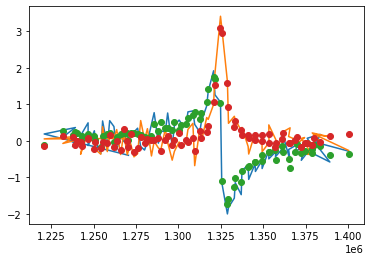

In [39]:
i = np.random.randint(0, data_noise.shape[0])
plt.plot(wvec_freq, data_noise[i, :, 0])
plt.plot(wvec_freq, data_noise[i, :, 1])

plt.plot(wvec_freq, data_[i, :, 0], 'o')
plt.plot(wvec_freq, data_[i, :, 1], 'o')

In [40]:
data_noise.shape

(1382400, 80, 2)

### Train/Test Split

In [41]:
data_train, data_test, params_train, params_test = train_test_split(data_, 
                                                                    scaled_params, 
                                                                    test_size=0.7,
                                                                    random_state=42)

params_test_unscaled = params_scaler.inverse_transform(params_test)

noise_train, noise_test = train_test_split(noise, test_size=0.7, random_state=42)

#### Training

In [42]:
ls

 Assets/
 Benchmarking/
 Benchmarking2/
 BGlib/
 codes/
 data_file.h5
 data_file_sho_fit.h5
 LaTeX/
 LICENSE
 notebooks/
 output10.txt
 output11.txt
 output12.txt
 output13.txt
 output14_0.txt
 output14_1.txt
 output14_2.txt
 output14_3.txt
 output14_4.txt
 output2.txt
 output3.txt
 output4.txt
 output5.txt
 output6.txt
 output7.txt
 output8.txt
 output9.txt
 output.txt
 Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/
'Raw Data'/
 README.md
 requirements.txt
'Trained Models'/


In [43]:
pwd

'/scratch/alibek_2/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting'

In [44]:
n = 0
# noise_factor = 0
seed = 42

### Reconstruction Model

In [45]:
class SHO_Model(nn.Module):
        def __init__(self):
            super().__init__()
            
            # Input block of 1d convolution
            self.hidden_x1 = nn.Sequential(
              nn.Conv1d(in_channels=2, out_channels=8, kernel_size=7),
              nn.SELU(),
              nn.Conv1d(in_channels=8, out_channels=6, kernel_size=7),
              nn.SELU(),
              nn.Conv1d(in_channels=6, out_channels=4, kernel_size=5),
              nn.SELU(),
            )

          # fully connected block
            self.hidden_xfc = nn.Sequential(
              nn.Linear(256, 20),
              nn.SELU(),
              nn.Linear(20, 20),
              nn.SELU(),
            )

          # 2nd block of 1d-conv layers
            self.hidden_x2 = nn.Sequential(
              nn.MaxPool1d(kernel_size=2),
              nn.Conv1d(in_channels=2, out_channels=4, kernel_size=5),
              nn.SELU(),
              nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
              nn.SELU(),
              nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
              nn.SELU(),
              nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
              nn.SELU(),
              nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
              nn.SELU(),
              nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
              nn.SELU(),
              nn.AvgPool1d(kernel_size=2),
              nn.Conv1d(in_channels=4, out_channels=2, kernel_size=3),
              nn.SELU(),
              nn.AvgPool1d(kernel_size=2),
              nn.Conv1d(in_channels=2, out_channels=2, kernel_size=3),
              nn.SELU(),
              nn.AvgPool1d(kernel_size=2),
            )

          # Flatten layer
            self.flatten_layer = nn.Flatten()

          # Final embedding block - Output 4 values - linear
            self.hidden_embedding = nn.Sequential(
              nn.Linear(26, 16),
              nn.SELU(),
              nn.Linear(16, 8),
              nn.SELU(),
              nn.Linear(8, 4),
            )

        def forward(self, x, n=-1):
            x = torch.swapaxes(x, 1, 2) # output shape - samples, (real, imag), frequency
            x = self.hidden_x1(x)
            xfc = torch.reshape(x, (n, 256)) # batch size, features
            xfc = self.hidden_xfc(xfc)
            x = torch.reshape(x, (n, 2, 128)) # batch size, (real, imag), timesteps
            x = self.hidden_x2(x)
            cnn_flat = self.flatten_layer(x)
            encoded = torch.cat((cnn_flat, xfc), 1) # merge dense and 1d conv.
            embedding = self.hidden_embedding(encoded) # output is 4 parameters

            # corrects the scaling of the parameters
            unscaled_param = embedding*torch.tensor(params_scaler.var_[0:4]**0.5).cuda() \
                                    + torch.tensor(params_scaler.mean_[0:4]).cuda()

            # passes to the pytorch fitting function 
            fits = SHO_fit_func_torch(unscaled_param, wvec_freq, device='cuda')

            # extract and return real and imaginary      
            real = torch.real(fits)
            real_scaled = (real - torch.tensor(scaler_real.mean).cuda())\
                                              /torch.tensor(scaler_real.std).cuda()
            imag = torch.imag(fits)
            imag_scaled = (imag - torch.tensor(scaler_imag.mean).cuda())\
                                              /torch.tensor(scaler_imag.std).cuda()
            out = torch.stack((real_scaled, imag_scaled), 2)
            return out

In [46]:
model = SHO_Model().cuda()

### Prediction model

In [47]:
class SHO_Model_Pred(nn.Module):
        def __init__(self):
            super().__init__()

          # Input block of 1d convolution
            self.hidden_x1 = nn.Sequential(
              nn.Conv1d(in_channels=2, out_channels=8, kernel_size=7),
              nn.SELU(),
              nn.Conv1d(in_channels=8, out_channels=6, kernel_size=7),
              nn.SELU(),
              nn.Conv1d(in_channels=6, out_channels=4, kernel_size=5),
              nn.SELU(),
            )

          # fully connected block
            self.hidden_xfc = nn.Sequential(
              nn.Linear(256, 20),
              nn.SELU(),
              nn.Linear(20, 20),
              nn.SELU(),
            )

          # 2nd block of 1d-conv layers
            self.hidden_x2 = nn.Sequential(
              nn.MaxPool1d(kernel_size=2),
              nn.Conv1d(in_channels=2, out_channels=4, kernel_size=5),
              nn.SELU(),
              nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
              nn.SELU(),
              nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
              nn.SELU(),
              nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
              nn.SELU(),
              nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
              nn.SELU(),
              nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
              nn.SELU(),
              nn.AvgPool1d(kernel_size=2),
              nn.Conv1d(in_channels=4, out_channels=2, kernel_size=3),
              nn.SELU(),
              nn.AvgPool1d(kernel_size=2),
              nn.Conv1d(in_channels=2, out_channels=2, kernel_size=3),
              nn.SELU(),
              nn.AvgPool1d(kernel_size=2),
            )

          # Flatten layer
            self.flatten_layer = nn.Flatten()

          # Final embedding block - Output 4 values - linear
            self.hidden_embedding = nn.Sequential(
              nn.Linear(26, 16),
              nn.SELU(),
              nn.Linear(16, 8),
              nn.SELU(),
              nn.Linear(8, 4),
            )

        def forward(self, x, n=-1):
            x = torch.swapaxes(x, 1, 2) # output shape - samples, (real, imag), frequency
            x = self.hidden_x1(x)
            xfc = torch.reshape(x, (n, 256)) # batch size, features
            xfc = self.hidden_xfc(xfc)
            x = torch.reshape(x, (n, 2, 128)) # batch size, (real, imag), timesteps
            x = self.hidden_x2(x)
            cnn_flat = self.flatten_layer(x)
            encoded = torch.cat((cnn_flat, xfc), 1) # merge dense and 1d conv.
            embedding = self.hidden_embedding(encoded) # output is 4 parameters

            # corrects the scaling of the parameters
            unscaled_param = embedding*torch.tensor(params_scaler.var_[0:4]**0.5).cuda() + torch.tensor(params_scaler.mean_[0:4]).cuda()
            return unscaled_param

In [48]:
max_num_of_updates = data_.shape[0] // 16 * 10

In [49]:
# epochs = 10 = max_num_of_updates / (data_.shape[0] / batch_size)

In [50]:
output_tensor_dict = {}
batch_size = 0

In [51]:
n

0

In [52]:
# Make statistics
# 1. 64 - 256 batch sizes
# 2. just run inference on the existing trained models
# 3. try to break LSQF with noisy raw data

## Training

In [ ]:
for runNum in range(4,5):
    n = 0
    seed *= 2 ** runNum
    with open(f'output14_{runNum}.txt', 'w') as f:
        while(n < 6):
            for noise_factor in np.arange(0, 0.5, 0.05):
                ##########################################################################################################
                # TRAINING
                torch.manual_seed(seed)
                np.random.seed(seed)
                torch.cuda.empty_cache()
                model = SHO_Model().cuda()

                loss_func = torch.nn.MSELoss()
                batch_size = 2**(2+n)
        #         noise_factor = n
                data_noise = data_ + noise * noise_factor
                data_train_noise = data_train + noise_train * noise_factor
                data_test_noise = data_test + noise_test * noise_factor

        #         num_of_updates = data.shape[0] // batch_size

                optimizer = AdaHessian(model.parameters(), lr=0.1)
                train_dataloader = DataLoader(data_train_noise, batch_size=batch_size)
                epochs = max_num_of_updates * batch_size // data_.shape[0]
    #             epochs = 5

        #         with open('results.txt', 'w') as f:
        #             f.write(f"Training with batch size = {batch_size}, noise factor = {noise_factor}")
                f.write(f"Training with batch size = {batch_size}, noise factor = {noise_factor}\n")
                print(f"Training with batch size = {batch_size}, noise factor = {noise_factor}")
                start_time_training = time.time()
                for epoch in range(epochs):
                    start_time = time.time()
                    train_loss = 0.
                    total_num = 0

                    model.train()

                    for train_batch in train_dataloader:
                        pred = model(train_batch.double().cuda())
                        optimizer.zero_grad()
                        loss = loss_func(train_batch.double().cuda(), pred)
                        loss.backward(create_graph=True)
                        train_loss += loss.item() * pred.shape[0]
                        total_num += pred.shape[0]
                        optimizer.step()

                    train_loss /= total_num
                    torch.save(model.state_dict(), f'/scratch/alibek_2/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Benchmarking2/Trained Models/SHO/model_AdaHessian_noise{noise_factor}_bs{batch_size}_{runNum}.pt')

                    f.write("epoch : {}/{}, recon loss = {:.8f}\n".format(epoch + 1, epochs, train_loss))
                    f.write("--- %s seconds ---\n" % (time.time() - start_time))
                    print("epoch : {}/{}, recon loss = {:.8f}".format(epoch + 1, epochs, train_loss))
                    print("--- %s seconds ---" % (time.time() - start_time))

                f.write(f"Training with batch size={batch_size} took {time.time() - start_time_training} seconds\n\n")
                print(f"Training with batch size={batch_size} took {time.time() - start_time_training} seconds\n")

                torch.cuda.empty_cache()
                train_dataloader_valid = DataLoader(data_noise, batch_size=batch_size)

                # Computes the inference time
                f.write(f"Inference time with batch size={batch_size}\n")
                print(f"Inference time with batch size={batch_size}")
                computeTime(model, next(iter(train_dataloader_valid)).double(), batch_size=batch_size)

                ##########################################################################################################

                # prediction of reconstructions
                batch_size = 100000
                train_dataloader = DataLoader(data_noise, batch_size=batch_size)

                num_elements = len(train_dataloader.dataset)
                num_batches = len(train_dataloader)
                predictions = torch.zeros_like(torch.tensor(data_noise))

                for i, train_batch in enumerate(train_dataloader):
                    start = i*batch_size
                    end = start + batch_size

                    if i == num_batches - 1:
                        end = num_elements

                    pred_batch = model(train_batch.double().cuda())
                    predictions[start:end] = pred_batch.cpu().detach()

                    del pred_batch
                    del train_batch
                    torch.cuda.empty_cache()


                f.write('Reconstruction error: ' + str((mean_squared_error(data_[:, :, 0], predictions[:, :, 0]) + mean_squared_error(data_[:, :, 1], predictions[:, :, 1]))/ 2.0) + '\n')
                print('Reconstruction error: ' + str((mean_squared_error(data_[:, :, 0], predictions[:, :, 0]) + mean_squared_error(data_[:, :, 1], predictions[:, :, 1]))/ 2.0))
    #             f.write('Reconstruction error: ' + str((mean_squared_error(data_noise[:, :, 0], predictions[:, :, 0]) + mean_squared_error(data_noise[:, :, 1], predictions[:, :, 1]))/ 2.0) + '\n')
    #             print('Reconstruction error: ' + str((mean_squared_error(data_noise[:, :, 0], predictions[:, :, 0]) + mean_squared_error(data_noise[:, :, 1], predictions[:, :, 1]))/ 2.0))

                ##########################################################################################################
                ##########################################################################################################
                # LOADING PARAMS MODEL
                batch_size = 2**(2+n)
                torch.cuda.empty_cache()
                model_parameters = SHO_Model_Pred().cuda()
                # loads prior trained model
                # model_parameters = torch.load(f'/scratch/alibek_2/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Benchmarking/Trained Models/SHO/model_AdaHessian_noise{noise_factor}_bs{batch_size}.pt')
                model_parameters.load_state_dict(torch.load(f'/scratch/alibek_2/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Benchmarking2/Trained Models/SHO/model_AdaHessian_noise{noise_factor}_bs{batch_size}_{runNum}.pt'))

                ##########################################################################################################

                # prediction of parameters
                batch_size = 100000
                train_dataloader = DataLoader(data_test_noise, batch_size=batch_size)

                num_elements = len(train_dataloader.dataset)
                num_batches = len(train_dataloader)
                test_pred_params = torch.zeros_like(torch.tensor(params_test))

                for i, train_batch in enumerate(train_dataloader):
                    start = i*batch_size
                    end = start + batch_size

                    if i == num_batches - 1:
                        end = num_elements

                    pred_batch = model_parameters(train_batch.double().cuda())
                    test_pred_params[start:end] = pred_batch.cpu().detach()

                    del pred_batch
                    del train_batch
                    torch.cuda.empty_cache()

            #     print(test_pred_params.shape)
                test_pred_params = test_pred_params.view(-1, 4)
                test_pred_params = test_pred_params.cpu().detach().numpy()
            #     print(test_pred_params.shape)

                # making numpy array copies of parameters
                test_params_copy = np.copy(params_test_unscaled)
                test_pred_params_copy = np.copy(test_pred_params)

                params_transformed, pred_params_transformed = transform_params(test_params_copy, test_pred_params_copy)

                ###########################################################################################################

                # prediction of parameters
                batch_size = 100000
                train_dataloader = DataLoader(data_noise, batch_size=batch_size)

                num_elements = len(train_dataloader.dataset)
                num_batches = len(train_dataloader)
                all_pred_params = torch.zeros_like(torch.tensor(params))

                for i, train_batch in enumerate(train_dataloader):
                    start = i*batch_size
                    end = start + batch_size

                    if i == num_batches - 1:
                        end = num_elements

                    pred_batch = model_parameters(train_batch.double().cuda())
                    all_pred_params[start:end] = pred_batch.cpu().detach()

                    del pred_batch
                    del train_batch
                    torch.cuda.empty_cache()

                all_pred_params = all_pred_params.cpu().detach().numpy()

                output_tensor_dict[f'data_noise{noise_factor}_bs{batch_size}'] = [predictions, all_pred_params]

                params_copy = np.copy(params)
                all_pred_params_copy = np.copy(all_pred_params)

                all_params_transformed, all_pred_params_transformed = transform_params(params_copy, all_pred_params_copy)

                all_pred_params_scaled = params_scaler.transform(all_pred_params_transformed)
                all_params_scaled = params_scaler.transform(all_params_transformed)

                f.write('\nResults\n')
                f.write('Total MSE: ' + str(mean_squared_error(all_params_scaled, all_pred_params_scaled)) + '\n')
                f.write('MSE of Amplitude: ' + str(mean_squared_error(all_params_scaled[:, 0], all_pred_params_scaled[:, 0])) + '\n')
                f.write('MSE of Resonance: ' + str(mean_squared_error(all_params_scaled[:, 1], all_pred_params_scaled[:, 1])) + '\n')
                f.write('MSE of Quality-Factor: ' + str(mean_squared_error(all_params_scaled[:, 2], all_pred_params_scaled[:, 2])) + '\n')
                f.write('MSE of Phase: ' + str(mean_squared_error(all_params_scaled[:, 3], all_pred_params_scaled[:, 3])) + '\n')
                f.write('------------------------------\n\n')

                print('\nResults')
                print('Total MSE: ' + str(mean_squared_error(all_params_scaled, all_pred_params_scaled)))
                print('MSE of Amplitude: ' + str(mean_squared_error(all_params_scaled[:, 0], all_pred_params_scaled[:, 0])))
                print('MSE of Resonance: ' + str(mean_squared_error(all_params_scaled[:, 1], all_pred_params_scaled[:, 1])))
                print('MSE of Quality-Factor: ' + str(mean_squared_error(all_params_scaled[:, 2], all_pred_params_scaled[:, 2])))
                print('MSE of Phase: ' + str(mean_squared_error(all_params_scaled[:, 3], all_pred_params_scaled[:, 3])))
                print('------------------------------\n')
                torch.cuda.empty_cache()

    #         n += 1
            n += 1

    # f.close()

Training with batch size = 4, noise factor = 0.0


[W Copy.cpp:240] Warning: Casting complex values to real discards the imaginary part (function operator())


## Inference

In [61]:
gc.collect()

36

In [62]:
run = 2

In [63]:
with open('output13.txt', 'w') as f:
    seed *= (run + 1)
    f.write(f"Run #{run} with random seed={seed}\n")
    print(f"Run #{run} with random seed={seed}")
    for n in reversed(range(9)):
        for noise_factor in np.arange(0, 0.5, 0.05):
            torch.manual_seed(seed)
            np.random.seed(seed)
            torch.cuda.empty_cache()
            model = SHO_Model().cuda()

            loss_func = torch.nn.MSELoss()
            batch_size = 2**n
    #         noise_factor = n
            data_noise = data_ + noise * noise_factor
            data_train_noise = data_train + noise_train * noise_factor
            data_test_noise = data_test + noise_test * noise_factor

            model.load_state_dict(torch.load(f'/scratch/alibek_2/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Benchmarking2/Trained Models/SHO/model_AdaHessian_noise{noise_factor}_bs{batch_size}.pt'))
            train_dataloader_valid = DataLoader(data_noise, batch_size=batch_size)

            # Computes the inference time
            f.write(f"Inference time with batch size={batch_size}, noise_factor={noise_factor}\n")
            print(f"Inference time with batch size={batch_size}, noise_factor={noise_factor}")
#             computeTime(model, next(iter(train_dataloader_valid)).double(), batch_size=batch_size)

            ##########################################################################################################

            # prediction of reconstructions
            batch_size = 100000
            train_dataloader = DataLoader(data_noise, batch_size=batch_size)

            num_elements = len(train_dataloader.dataset)
            num_batches = len(train_dataloader)
            predictions = torch.zeros_like(torch.tensor(data_noise))

            for i, train_batch in enumerate(train_dataloader):
                start = i*batch_size
                end = start + batch_size

                if i == num_batches - 1:
                    end = num_elements

                pred_batch = model(train_batch.double().cuda())
                predictions[start:end] = pred_batch.cpu().detach()

                del pred_batch
                del train_batch
                torch.cuda.empty_cache()


            f.write('Reconstruction error: ' + str((mean_squared_error(data_[:, :, 0], predictions[:, :, 0]) + mean_squared_error(data_[:, :, 1], predictions[:, :, 1]))/ 2.0) + '\n')
            print('Reconstruction error: ' + str((mean_squared_error(data_[:, :, 0], predictions[:, :, 0]) + mean_squared_error(data_[:, :, 1], predictions[:, :, 1]))/ 2.0))
#             f.write('Reconstruction error: ' + str((mean_squared_error(data_noise[:, :, 0], predictions[:, :, 0]) + mean_squared_error(data_noise[:, :, 1], predictions[:, :, 1]))/ 2.0) + '\n')
#             print('Reconstruction error: ' + str((mean_squared_error(data_noise[:, :, 0], predictions[:, :, 0]) + mean_squared_error(data_noise[:, :, 1], predictions[:, :, 1]))/ 2.0))

            ##########################################################################################################
            ##########################################################################################################
            # LOADING PARAMS MODEL
            batch_size = 2**n
            torch.cuda.empty_cache()
            model_parameters = SHO_Model_Pred().cuda()
            # loads prior trained model
            # model_parameters = torch.load(f'/scratch/alibek_2/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Benchmarking/Trained Models/SHO/model_AdaHessian_noise{noise_factor}_bs{batch_size}.pt')
            model_parameters.load_state_dict(torch.load(f'/scratch/alibek_2/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Benchmarking2/Trained Models/SHO/model_AdaHessian_noise{noise_factor}_bs{batch_size}.pt'))

            ##########################################################################################################

            # prediction of parameters
            batch_size = 100000
            train_dataloader = DataLoader(data_test_noise, batch_size=batch_size)

            num_elements = len(train_dataloader.dataset)
            num_batches = len(train_dataloader)
            test_pred_params = torch.zeros_like(torch.tensor(params_test))

            for i, train_batch in enumerate(train_dataloader):
                start = i*batch_size
                end = start + batch_size

                if i == num_batches - 1:
                    end = num_elements

                pred_batch = model_parameters(train_batch.double().cuda())
                test_pred_params[start:end] = pred_batch.cpu().detach()

                del pred_batch
                del train_batch
                torch.cuda.empty_cache()

        #     print(test_pred_params.shape)
            test_pred_params = test_pred_params.view(-1, 4)
            test_pred_params = test_pred_params.cpu().detach().numpy()
        #     print(test_pred_params.shape)

            # making numpy array copies of parameters
            test_params_copy = np.copy(params_test_unscaled)
            test_pred_params_copy = np.copy(test_pred_params)

            params_transformed, pred_params_transformed = transform_params(test_params_copy, test_pred_params_copy)

            ###########################################################################################################

            # prediction of parameters
            batch_size = 100000
            train_dataloader = DataLoader(data_noise, batch_size=batch_size)

            num_elements = len(train_dataloader.dataset)
            num_batches = len(train_dataloader)
            all_pred_params = torch.zeros_like(torch.tensor(params))

            for i, train_batch in enumerate(train_dataloader):
                start = i*batch_size
                end = start + batch_size

                if i == num_batches - 1:
                    end = num_elements

                pred_batch = model_parameters(train_batch.double().cuda())
                all_pred_params[start:end] = pred_batch.cpu().detach()

                del pred_batch
                del train_batch
                torch.cuda.empty_cache()

            all_pred_params = all_pred_params.cpu().detach().numpy()

            output_tensor_dict[f'data_noise{noise_factor}_bs{batch_size}'] = [predictions, all_pred_params]

            params_copy = np.copy(params)
            all_pred_params_copy = np.copy(all_pred_params)

            all_params_transformed, all_pred_params_transformed = transform_params(params_copy, all_pred_params_copy)

            all_pred_params_scaled = params_scaler.transform(all_pred_params_transformed)
            all_params_scaled = params_scaler.transform(all_params_transformed)

            f.write('\nResults\n')
            f.write('Total MSE: ' + str(mean_squared_error(all_params_scaled, all_pred_params_scaled)) + '\n')
            f.write('MSE of Amplitude: ' + str(mean_squared_error(all_params_scaled[:, 0], all_pred_params_scaled[:, 0])) + '\n')
            f.write('MSE of Resonance: ' + str(mean_squared_error(all_params_scaled[:, 1], all_pred_params_scaled[:, 1])) + '\n')
            f.write('MSE of Quality-Factor: ' + str(mean_squared_error(all_params_scaled[:, 2], all_pred_params_scaled[:, 2])) + '\n')
            f.write('MSE of Phase: ' + str(mean_squared_error(all_params_scaled[:, 3], all_pred_params_scaled[:, 3])) + '\n')
            f.write('------------------------------\n\n')

            print('\nResults')
            print('Total MSE: ' + str(mean_squared_error(all_params_scaled, all_pred_params_scaled)))
            print('MSE of Amplitude: ' + str(mean_squared_error(all_params_scaled[:, 0], all_pred_params_scaled[:, 0])))
            print('MSE of Resonance: ' + str(mean_squared_error(all_params_scaled[:, 1], all_pred_params_scaled[:, 1])))
            print('MSE of Quality-Factor: ' + str(mean_squared_error(all_params_scaled[:, 2], all_pred_params_scaled[:, 2])))
            print('MSE of Phase: ' + str(mean_squared_error(all_params_scaled[:, 3], all_pred_params_scaled[:, 3])))
            print('------------------------------\n')
            torch.cuda.empty_cache()

            del model
            del train_dataloader
            del all_pred_params_scaled
            del all_params_scaled
            del all_params_transformed
            del all_pred_params_transformed
            del params_copy
            del all_pred_params_copy
            del predictions
            del all_pred_params

Run #2 with random seed=126
Inference time with batch size=256, noise_factor=0.0
Reconstruction error: 0.04426281567881346

Results
Total MSE: 0.12160292
MSE of Amplitude: 0.012782551
MSE of Resonance: 0.35792968
MSE of Quality-Factor: 0.088604614
MSE of Phase: 0.028412009
------------------------------

Inference time with batch size=256, noise_factor=0.05
Reconstruction error: 0.04226986174052223

Results
Total MSE: 0.38658643
MSE of Amplitude: 0.008604198
MSE of Resonance: 0.40060616
MSE of Quality-Factor: 0.06716312
MSE of Phase: 1.0709912
------------------------------

Inference time with batch size=256, noise_factor=0.1
Reconstruction error: 0.042266148981725524

Results
Total MSE: 0.13913336
MSE of Amplitude: 0.008471239
MSE of Resonance: 0.4361952
MSE of Quality-Factor: 0.07104491
MSE of Phase: 0.042031653
------------------------------

Inference time with batch size=256, noise_factor=0.15000000000000002
Reconstruction error: 0.042279312770233085

Results
Total MSE: 0.3800754

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/alibek_2/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Benchmarking2/Trained Models/SHO/model_AdaHessian_noise0.0_bs1.pt'

In [66]:
!nvidia-smi

Tue Dec 28 06:02:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.73.01    Driver Version: 460.73.01    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:2F:00.0 Off |                    0 |
| N/A   32C    P0    61W / 400W |   2479MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  A100-SXM4-40GB      Off  | 00000000:30:00.0 Off |                    0 |
| N/A   

In [ ]:
# with open('output12.txt', 'w') as f:
#     for run in range(1, 3):
#         seed *= (run + 1)
#         f.write(f"Run #{run} with random seed={seed}\n")
#         print(f"Run #{run} with random seed={seed}")
#         for n in reversed(range(9)):
#             for noise_factor in np.arange(0, 0.5, 0.05):
#                 torch.manual_seed(seed)
#                 np.random.seed(seed)
#                 torch.cuda.empty_cache()
#                 model = SHO_Model().cuda()

#                 loss_func = torch.nn.MSELoss()
#                 batch_size = 2**n
#         #         noise_factor = n
#                 data_noise = data_ + noise * noise_factor
#                 data_train_noise = data_train + noise_train * noise_factor
#                 data_test_noise = data_test + noise_test * noise_factor
                
#                 model.load_state_dict(torch.load(f'/scratch/alibek_2/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Benchmarking2/Trained Models/SHO/model_AdaHessian_noise{noise_factor}_bs{batch_size}.pt'))
#                 train_dataloader_valid = DataLoader(data_noise, batch_size=batch_size)

#                 # Computes the inference time
#                 f.write(f"Inference time with batch size={batch_size}, noise_factor={noise_factor}\n")
#                 print(f"Inference time with batch size={batch_size}, noise_factor={noise_factor}")
#                 computeTime(model, next(iter(train_dataloader_valid)).double(), batch_size=batch_size)

#                 ##########################################################################################################

#                 # prediction of reconstructions
#                 batch_size = 100000
#                 train_dataloader = DataLoader(data_noise, batch_size=batch_size)

#                 num_elements = len(train_dataloader.dataset)
#                 num_batches = len(train_dataloader)
#                 predictions = torch.zeros_like(torch.tensor(data_noise))

#                 for i, train_batch in enumerate(train_dataloader):
#                     start = i*batch_size
#                     end = start + batch_size

#                     if i == num_batches - 1:
#                         end = num_elements

#                     pred_batch = model(train_batch.double().cuda())
#                     predictions[start:end] = pred_batch.cpu().detach()

#                     del pred_batch
#                     del train_batch
#                     torch.cuda.empty_cache()


#                 f.write('Reconstruction error: ' + str((mean_squared_error(data_[:, :, 0], predictions[:, :, 0]) + mean_squared_error(data_[:, :, 1], predictions[:, :, 1]))/ 2.0) + '\n')
#                 print('Reconstruction error: ' + str((mean_squared_error(data_[:, :, 0], predictions[:, :, 0]) + mean_squared_error(data_[:, :, 1], predictions[:, :, 1]))/ 2.0))
#     #             f.write('Reconstruction error: ' + str((mean_squared_error(data_noise[:, :, 0], predictions[:, :, 0]) + mean_squared_error(data_noise[:, :, 1], predictions[:, :, 1]))/ 2.0) + '\n')
#     #             print('Reconstruction error: ' + str((mean_squared_error(data_noise[:, :, 0], predictions[:, :, 0]) + mean_squared_error(data_noise[:, :, 1], predictions[:, :, 1]))/ 2.0))

#                 ##########################################################################################################
#                 ##########################################################################################################
#                 # LOADING PARAMS MODEL
#                 batch_size = 2**n
#                 torch.cuda.empty_cache()
#                 model_parameters = SHO_Model_Pred().cuda()
#                 # loads prior trained model
#                 # model_parameters = torch.load(f'/scratch/alibek_2/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Benchmarking/Trained Models/SHO/model_AdaHessian_noise{noise_factor}_bs{batch_size}.pt')
#                 model_parameters.load_state_dict(torch.load(f'/scratch/alibek_2/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Benchmarking2/Trained Models/SHO/model_AdaHessian_noise{noise_factor}_bs{batch_size}.pt'))

#                 ##########################################################################################################

#                 # prediction of parameters
#                 batch_size = 100000
#                 train_dataloader = DataLoader(data_test_noise, batch_size=batch_size)

#                 num_elements = len(train_dataloader.dataset)
#                 num_batches = len(train_dataloader)
#                 test_pred_params = torch.zeros_like(torch.tensor(params_test))

#                 for i, train_batch in enumerate(train_dataloader):
#                     start = i*batch_size
#                     end = start + batch_size

#                     if i == num_batches - 1:
#                         end = num_elements

#                     pred_batch = model_parameters(train_batch.double().cuda())
#                     test_pred_params[start:end] = pred_batch.cpu().detach()

#                     del pred_batch
#                     del train_batch
#                     torch.cuda.empty_cache()

#             #     print(test_pred_params.shape)
#                 test_pred_params = test_pred_params.view(-1, 4)
#                 test_pred_params = test_pred_params.cpu().detach().numpy()
#             #     print(test_pred_params.shape)

#                 # making numpy array copies of parameters
#                 test_params_copy = np.copy(params_test_unscaled)
#                 test_pred_params_copy = np.copy(test_pred_params)

#                 params_transformed, pred_params_transformed = transform_params(test_params_copy, test_pred_params_copy)

#                 ###########################################################################################################

#                 # prediction of parameters
#                 batch_size = 100000
#                 train_dataloader = DataLoader(data_noise, batch_size=batch_size)

#                 num_elements = len(train_dataloader.dataset)
#                 num_batches = len(train_dataloader)
#                 all_pred_params = torch.zeros_like(torch.tensor(params))

#                 for i, train_batch in enumerate(train_dataloader):
#                     start = i*batch_size
#                     end = start + batch_size

#                     if i == num_batches - 1:
#                         end = num_elements

#                     pred_batch = model_parameters(train_batch.double().cuda())
#                     all_pred_params[start:end] = pred_batch.cpu().detach()

#                     del pred_batch
#                     del train_batch
#                     torch.cuda.empty_cache()

#                 all_pred_params = all_pred_params.cpu().detach().numpy()

#                 output_tensor_dict[f'data_noise{noise_factor}_bs{batch_size}'] = [predictions, all_pred_params]

#                 params_copy = np.copy(params)
#                 all_pred_params_copy = np.copy(all_pred_params)

#                 all_params_transformed, all_pred_params_transformed = transform_params(params_copy, all_pred_params_copy)

#                 all_pred_params_scaled = params_scaler.transform(all_pred_params_transformed)
#                 all_params_scaled = params_scaler.transform(all_params_transformed)

#                 f.write('\nResults\n')
#                 f.write('Total MSE: ' + str(mean_squared_error(all_params_scaled, all_pred_params_scaled)) + '\n')
#                 f.write('MSE of Amplitude: ' + str(mean_squared_error(all_params_scaled[:, 0], all_pred_params_scaled[:, 0])) + '\n')
#                 f.write('MSE of Resonance: ' + str(mean_squared_error(all_params_scaled[:, 1], all_pred_params_scaled[:, 1])) + '\n')
#                 f.write('MSE of Quality-Factor: ' + str(mean_squared_error(all_params_scaled[:, 2], all_pred_params_scaled[:, 2])) + '\n')
#                 f.write('MSE of Phase: ' + str(mean_squared_error(all_params_scaled[:, 3], all_pred_params_scaled[:, 3])) + '\n')
#                 f.write('------------------------------\n\n')

#                 print('\nResults')
#                 print('Total MSE: ' + str(mean_squared_error(all_params_scaled, all_pred_params_scaled)))
#                 print('MSE of Amplitude: ' + str(mean_squared_error(all_params_scaled[:, 0], all_pred_params_scaled[:, 0])))
#                 print('MSE of Resonance: ' + str(mean_squared_error(all_params_scaled[:, 1], all_pred_params_scaled[:, 1])))
#                 print('MSE of Quality-Factor: ' + str(mean_squared_error(all_params_scaled[:, 2], all_pred_params_scaled[:, 2])))
#                 print('MSE of Phase: ' + str(mean_squared_error(all_params_scaled[:, 3], all_pred_params_scaled[:, 3])))
#                 print('------------------------------\n')
#                 torch.cuda.empty_cache()
                
#                 del model
#                 del train_dataloader
#                 del all_pred_params_scaled
#                 del all_params_scaled
#                 del all_params_transformed
#                 del all_pred_params_transformed
#                 del params_copy
#                 del all_pred_params_copy
#                 del predictions
#                 del all_pred_params

In [ ]:
!nvidia-smi

## Figures of results

In [157]:
# Run 1
i = 0
lines = []
batch_sizes_1 = []
noise_factors_1 = []
mse_reconstructions_1 = []
mse_params_1 = []

with open('output11.txt') as f:
    lines = f.readlines()
    
for line in lines:
    if(i == 50): break
    words = line.split()
    if(len(words) == 0):
        continue
#     print(words)
    if(words[0] == "Inference"):
        bs = words[4]
        bs = int(bs[5:-1])
        batch_sizes_1.append(bs)
        nf = words[5]
        nf = float(nf[13:])
        noise_factors_1.append(nf)
    if(words[0] == "Reconstruction"):
        mse_reconstructions_1.append(float(words[2]))
    if(words[0] == "Total"):
        mse_params_1.append(float(words[2]))
        i+=1

# Run 2
i = 0
lines = []
batch_sizes_2 = []
noise_factors_2 = []
mse_reconstructions_2 = []
mse_params_2 = []

with open('output12.txt') as f:
    lines = f.readlines()
    
for line in lines:
    if(i == 50): break
    words = line.split()
    if(len(words) == 0):
        continue
#     print(words)
    if(words[0] == "Inference"):
        bs = words[4]
        bs = int(bs[5:-1])
        batch_sizes_2.append(bs)
        nf = words[5]
        nf = float(nf[13:])
        noise_factors_2.append(nf)
    if(words[0] == "Reconstruction"):
        mse_reconstructions_2.append(float(words[2]))
    if(words[0] == "Total"):
        mse_params_2.append(float(words[2]))
        i+=1

# Run 3
i = 0
lines = []
batch_sizes_3 = []
noise_factors_3 = []
mse_reconstructions_3 = []
mse_params_3 = []

with open('output13.txt') as f:
    lines = f.readlines()
    
for line in lines:
    if(i == 50): break
    words = line.split()
    if(len(words) == 0):
        continue
#     print(words)
    if(words[0] == "Inference"):
        bs = words[4]
        bs = int(bs[5:-1])
        batch_sizes_3.append(bs)
        nf = words[5]
        nf = float(nf[13:])
        noise_factors_3.append(nf)
    if(words[0] == "Reconstruction"):
        mse_reconstructions_3.append(float(words[2]))
    if(words[0] == "Total"):
        mse_params_3.append(float(words[2]))
        i+=1

In [158]:
# calculate average between 3 runs
noise_factors_avg = []
mse_reconstructions_avg = []
mse_params_avg = []

for i in range(len(noise_factors_3)):
    noise_factors_avg.append((noise_factors_1[i] + noise_factors_2[i] + noise_factors_3[i]) / 3)
    mse_reconstructions_avg.append((mse_reconstructions_1[i] + mse_reconstructions_2[i] + mse_reconstructions_3[i]) / 3)
    mse_params_avg.append((mse_params_1[i] + mse_params_2[i] + mse_params_3[i]) / 3)

In [159]:
len(noise_factors_avg)

50

In [160]:
max(mse_reconstructions_avg)

0.9150530691504958

In [161]:
min(mse_params_avg)

0.10674071

In [162]:
batch_sizes_1[0] + batch_sizes_1[1]

512

In [163]:
np.squeeze(np.argwhere(np.array(batch_sizes_1).flatten()==i))

array([], dtype=int64)

In [171]:
mse_reconstructions_1

[0.04426281567881346,
 0.04227873534912886,
 0.04226637326123101,
 0.042279714350919234,
 0.04240338402470785,
 0.04248729728747713,
 0.04292581919328608,
 0.04295091557736459,
 0.043285369753835665,
 0.043533898711691256,
 0.04227890421433808,
 0.04261945135092027,
 0.04267301955792009,
 0.04290209997125981,
 0.042498595984011095,
 0.04257883028336168,
 0.04273005955383999,
 0.043052607015936654,
 0.04312045905568261,
 0.04400451142033805,
 0.04218738607086414,
 0.04231340873551294,
 0.04226183907468159,
 0.042334201109844496,
 0.04326677770793963,
 0.042705898776365436,
 0.042976386354431094,
 0.04294468828574345,
 0.04319686483765621,
 0.04356615649536821,
 0.04225878023288805,
 0.04253947597312524,
 0.04231895104964646,
 0.042470756688727504,
 0.04252986167158035,
 0.04250036947155561,
 0.04276514836947576,
 0.04296987178909388,
 0.04330977338601414,
 0.0433989701683756,
 0.9150530691504958,
 0.04224483699321277,
 0.6108198842717107,
 0.042432563695508733,
 0.04240589460373695,
 0.

In [170]:
mse_reconstructions_3

[0.04426281567881346,
 0.04226986174052223,
 0.042266148981725524,
 0.042279312770233085,
 0.04240346442238191,
 0.042487196818273384,
 0.04292402270363946,
 0.042950637939609654,
 0.04328488711798832,
 0.043532874789019384,
 0.04227890421433808,
 0.042619421246338204,
 0.042673161101459696,
 0.04290193944534533,
 0.04249869129571717,
 0.04257899393271982,
 0.042729582749942374,
 0.04305227736799458,
 0.043119801687009275,
 0.04400419914613503,
 0.04218738607086414,
 0.04231347376950899,
 0.04226158279893082,
 0.04233453321485106,
 0.04326677635353704,
 0.04270650255429527,
 0.04297639414674357,
 0.042945214309110316,
 0.04319705847957296,
 0.04356421184150458,
 0.04225878023288805,
 0.04253967578772712,
 0.042319359218073685,
 0.04247091219688558,
 0.042529940484688916,
 0.04249945752866169,
 0.042764890774077954,
 0.04296920708636027,
 0.043308363841501926,
 0.043396968516309475,
 0.9150530691504958,
 0.042244929770191175,
 0.6108184445951717,
 0.04243235554909059,
 0.042405722198688

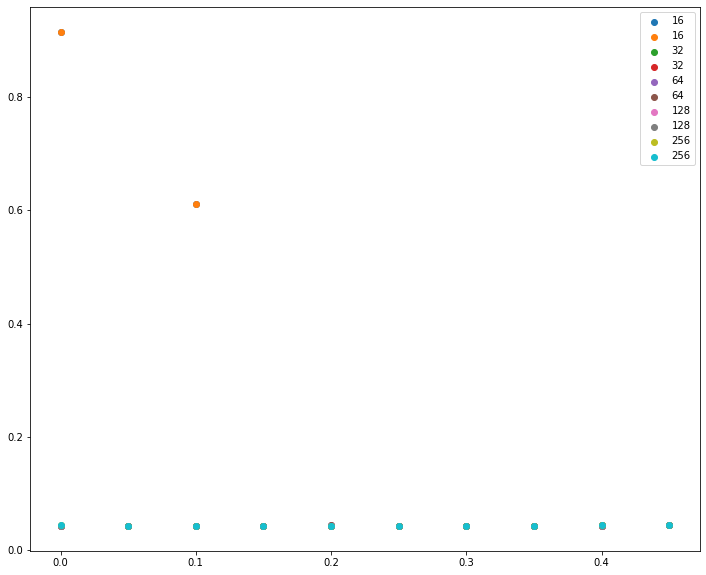

In [168]:
fig = plt.figure(figsize=(12,10))

for i in np.unique(np.array(batch_sizes_1)):
    indicies = np.squeeze(np.argwhere(np.array(batch_sizes_1).flatten()==i))
    plt.scatter(np.array(noise_factors_avg)[indicies], np.array(mse_reconstructions_3)[indicies], label=i)
    plt.scatter(np.array(noise_factors_avg)[indicies], np.array(mse_reconstructions_1)[indicies], label=i)

plt.legend()
#plt.ylim([0.0425,.0440])
    

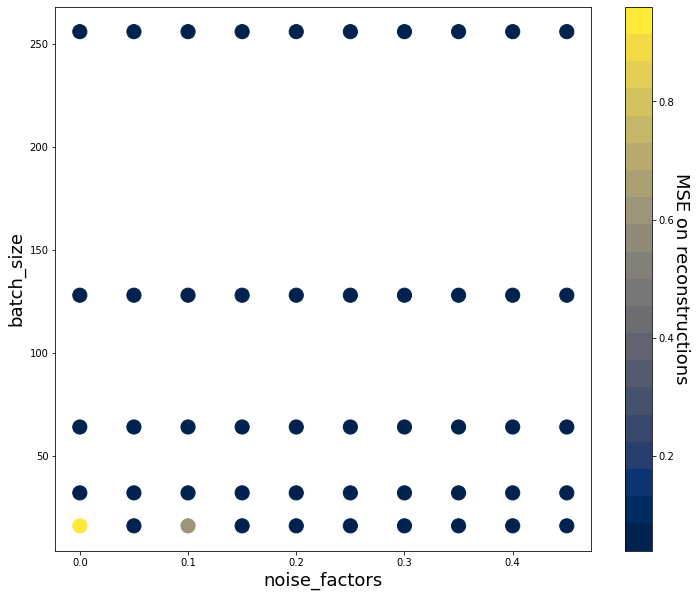

In [135]:
fig = plt.figure(figsize=(12, 10))

labels = np.arange(0.04, 0.96)

cmap = plt.cm.get_cmap("cividis",20)
plt.scatter(noise_factors_avg, batch_sizes_1, c=mse_reconstructions_avg, s=200, label=labels,cmap=cmap,vmin=0.04,vmax=0.96)
cbar = plt.colorbar()
# for i in range(0, len(batch_sizes), 10):
#     plt.plot(noise_factors[i:i+11], mse_reconstructions[i:i+11])
# plt.plot(batch_sizes, mse_reconstructions)
plt.xlabel('noise_factors', fontsize=18)
plt.ylabel('batch_size', fontsize=18)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('MSE on reconstructions', rotation=270, fontsize=18)

plt.show()

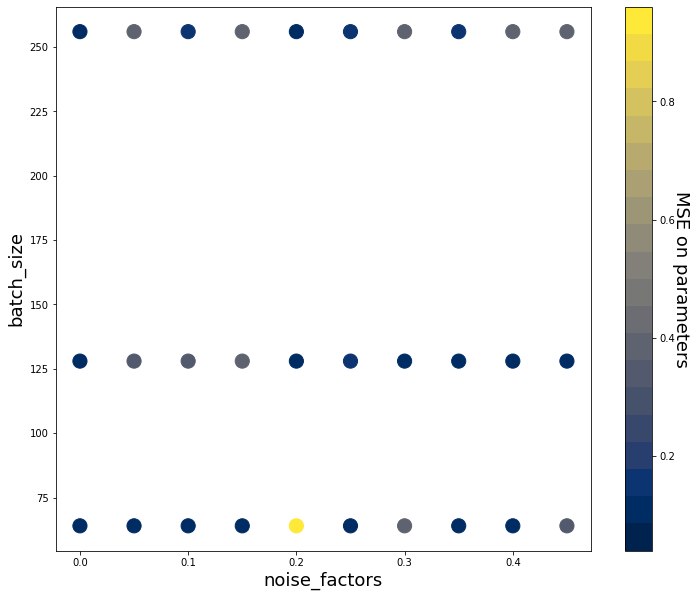

In [128]:
fig = plt.figure(figsize=(12, 10))

labels = np.arange(0.04, 0.96)

cmap = plt.cm.get_cmap("cividis",20)
plt.scatter(noise_factors_avg, batch_sizes_1, c=mse_params_avg, s=200, label=labels,cmap=cmap,vmin=0.04,vmax=0.96)
cbar = plt.colorbar()
# for i in range(0, len(batch_sizes), 10):
#     plt.plot(noise_factors[i:i+11], mse_reconstructions[i:i+11])
# plt.plot(batch_sizes, mse_reconstructions)
plt.xlabel('noise_factors', fontsize=18)
plt.ylabel('batch_size', fontsize=18)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('MSE on parameters', rotation=270, fontsize=18)

plt.show()

In [ ]:
fig = plt.figure(figsize=(8, 6))

# labels = [0.04, 0.136, 0.232, 0.328, 0.424, 0.52, 0.616, 0.712, 0.808, 0.904, 1.0]
labels = np.arange(0.04, 0.96)

cmap = plt.cm.get_cmap("cividis",20)
plt.scatter(noise_factors, batch_sizes, c=mse_reconstructions, s=200, label=labels,cmap=cmap,vmin=0.04,vmax=0.96)
cbar = plt.colorbar()
plt.xlabel('noise_factors', fontsize=18)
plt.ylabel('batch_sizes', fontsize=18)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('MSE on reconstructions', rotation=270, fontsize=18)

plt.show()

In [ ]:
fig = plt.figure(figsize=(8, 6))

# labels = [0.04, 0.136, 0.232, 0.328, 0.424, 0.52, 0.616, 0.712, 0.808, 0.904, 1.0]
labels = np.arange(0.04, 0.96)

cmap = plt.cm.get_cmap("cividis",20)
plt.scatter(noise_factors, batch_sizes, c=mse_params, s=200, label=labels,cmap=cmap,vmin=0.04,vmax=0.96)
cbar = plt.colorbar()
plt.xlabel('noise_factors', fontsize=18)
plt.ylabel('batch_sizes', fontsize=18)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('MSE on parameters', rotation=270, fontsize=18)

plt.show()

In [ ]:
test_pred_params.shape

In [ ]:
pred_batch.shape

In [ ]:
train_batch.shape

In [ ]:
batch_size=16
model = SHO_Model().cuda()
# loads prior trained model
model.load_state_dict(torch.load(f'/scratch/alibek_2/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Benchmarking/Trained Models/SHO/model_AdaHessian_noise{noise_factor}_bs{batch_size}.pt'))

In [ ]:
batch_size=16
model_parameters = SHO_Model_Pred().cuda()
# loads prior trained model
model_parameters.load_state_dict(torch.load(f'/scratch/alibek_2/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Benchmarking/Trained Models/SHO/model_AdaHessian_noise{noise_factor}_bs{batch_size}.pt'))

In [ ]:
model_parameters(train_batch.double().cuda()).shape

In [ ]:
model_parameters